### Instalasi dan Import Pustaka yang Dibutuhkan

Pada tahap awal ini, dilakukan instalasi dan import berbagai pustaka yang diperlukan untuk analisis sentimen ulasan aplikasi Grab. Pustaka-pustaka ini terbagi ke dalam beberapa kategori:

1. **Instalasi Eksternal**
   - `Sastrawi`: Digunakan untuk proses penghapusan kata tidak penting (stopword removal) dalam bahasa Indonesia.

2. **Manipulasi Data dan Visualisasi**
   - `pandas`, `numpy`: Untuk manipulasi data numerik dan tabular.
   - `matplotlib.pyplot`, `seaborn`: Untuk membuat visualisasi grafik dan analisis eksploratif.
   - `WordCloud`: Untuk visualisasi kata yang sering muncul dalam bentuk awan kata.

3. **Pemrosesan Teks**
   - `re`, `string`, `json`, `requests`, `pickle`: Berbagai utilitas Python untuk pemrosesan string dan penyimpanan.
   - `nltk`: Untuk tokenisasi dan stopwords dalam bahasa Inggris.
   - `Sastrawi.StopWordRemoverFactory`: Untuk stopword removal dalam bahasa Indonesia.
   - Dependensi tambahan NLTK seperti `punkt`, `stopwords`, dan `punkt_tab` juga diunduh.

4. **Pembelajaran Mesin (Machine Learning)**
   - `TfidfVectorizer`: Untuk mengubah teks menjadi representasi numerik.
   - `train_test_split`: Untuk membagi data latih dan data uji.
   - `SVC`, `RandomForestClassifier`: Model untuk klasifikasi.
   - `accuracy_score`, `precision_score`, `classification_report`, `confusion_matrix`: Untuk evaluasi model.

5. **Pembelajaran Mendalam (Deep Learning)**
   - `Tokenizer`, `pad_sequences`, `Sequential`, dan berbagai layer dari Keras untuk membangun model LSTM atau GRU.
   - `EarlyStopping`, `ReduceLROnPlateau`: Untuk optimisasi proses pelatihan.
   - `Adam`, `l2`: Optimizer dan regularizer.

6. **Lain-lain**
   - `warnings`: Digunakan untuk menyembunyikan peringatan dari output saat notebook dijalankan.

Dengan semua pustaka ini, proses analisis sentimen baik menggunakan pendekatan machine learning maupun deep learning dapat dilakukan secara lengkap.

In [1]:
# Instalasi pustaka yang dibutuhkan
!pip install Sastrawi

# Pustaka untuk manipulasi data dan visualisasi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Pemrosesan teks
import re
import string
import json
import requests
import pickle
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import download as nltk_unduh
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

# Mengunduh dependensi NLTK
nltk_unduh('punkt')
nltk_unduh('punkt_tab')
nltk_unduh('stopwords')

# Pustaka untuk pembelajaran mesin
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, classification_report, confusion_matrix

# Pustaka untuk pembelajaran mendalam
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Flatten, GRU, SpatialDropout1D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, Callback, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

# Menonaktifkan peringatan sistem
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Memuat Dataset Ulasan Aplikasi Grab

Pada tahap ini, dataset ulasan pengguna aplikasi Grab dimuat dari file CSV. Dataset ini sebelumnya telah diambil dari Google Play Store melalui proses scraping dan disimpan di folder `Datasets`.

Dataset yang dimuat berisi dua kolom utama:
- `content`: berisi teks ulasan dari pengguna.
- `score`: berisi nilai rating yang diberikan pengguna terhadap aplikasi (biasanya antara 1–5).

Setelah dimuat ke dalam variabel `data_frame`, beberapa baris pertama dari data ditampilkan untuk memberikan gambaran struktur dan isi dataset yang akan dianalisis.

In [14]:
# Memuat dataset ulasan dari file CSV lokal
file_path = "../Datasets/grab_reviews.csv"
df = pd.read_csv(file_path)

# Menampilkan beberapa baris awal dari dataset
print("Contoh data ulasan:")
df.head()

Contoh data ulasan:


,content,score
0,kurang menarik karena brang saya ga di kembalikan,3
1,Thanks udah di anterin,5
2,Dengan adanya apk grab perjalan saya dgn tujua...,5
3,sangat membantu,5
4,bagus pelayanan beik dan cepat respon.,5


### Exploratory Data Analysis (EDA)



#### Menampilkan Informasi Umum dan Pengecekan Data Kosong

Tahapan ini bertujuan untuk memahami struktur dataset secara umum dan mengidentifikasi potensi masalah data seperti nilai yang hilang.

Langkah-langkah yang dilakukan:
1. **`df.info()`**: 
   - Menampilkan informasi struktur DataFrame, termasuk jumlah entri, jumlah kolom, tipe data pada setiap kolom, serta jumlah non-null pada masing-masing kolom.
   - Berguna untuk memastikan bahwa dataset telah dimuat dengan benar dan kolom-kolom penting seperti `content` dan `score` tidak kosong.

2. **`df.isnull().sum()`**:
   - Mengecek apakah terdapat nilai kosong (missing values) pada dataset.
   - Hal ini penting untuk memastikan kualitas data sebelum masuk ke tahap preprocessing dan pelatihan model.

Dengan melakukan pengecekan ini sejak awal, kita bisa menghindari error saat pemrosesan data lanjutan atau pelatihan model.

In [15]:
# Menampilkan informasi dasar dari dataset
df.info()

# Mengecek apakah ada nilai kosong di setiap kolom
print("Nilai yang hilang:")
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  20000 non-null  object
 1   score    20000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 312.6+ KB
Nilai yang hilang:
content    0
score      0
dtype: int64


#### Visualisasi Distribusi Rating Ulasan

Tahapan ini bertujuan untuk memahami sebaran sentimen pengguna terhadap aplikasi Grab berdasarkan nilai rating (1 hingga 5).

Langkah-langkah yang dilakukan:
1. **Visualisasi dengan `countplot`**:
   - Menggunakan `seaborn.countplot()` untuk menampilkan grafik batang yang menunjukkan jumlah ulasan untuk setiap kategori skor.
   - Warna grafik diatur menggunakan palet `viridis` agar tampil lebih informatif dan menarik.

2. **`value_counts()`**:
   - Menampilkan jumlah absolut dari masing-masing skor (1, 2, 3, 4, 5).
   - Ini membantu mengidentifikasi apakah dataset seimbang (balanced) atau tidak (unbalanced), yang akan sangat memengaruhi kinerja model klasifikasi nantinya.

Distribusi rating sangat penting sebagai dasar pengkategorian sentimen (positif, negatif, netral) dan dapat digunakan untuk menetapkan label kelas pada proses supervised learning.

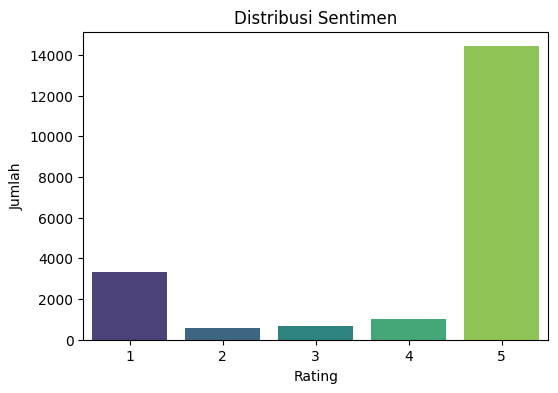

score
5    14420
1     3307
4     1040
3      652
2      581
Name: count, dtype: int64


In [16]:
# Visualisasi distribusi rating pengguna terhadap aplikasi Grab
plt.figure(figsize=(6, 4))
sns.countplot(x=df['score'], palette='viridis')
plt.title("Distribusi Sentimen")
plt.xlabel("Rating")
plt.ylabel("Jumlah")
plt.show()

# Menampilkan jumlah ulasan berdasarkan masing-masing skor
print(df['score'].value_counts())

### Text Preprocessing




#### Fungsi Pembersihan Teks Ulasan

Tahapan ini merupakan bagian awal dari proses **preprocessing teks**. Tujuannya adalah membersihkan teks ulasan agar lebih seragam dan siap digunakan dalam analisis sentimen atau pemodelan machine learning.

Fungsi `proses_teks(teks)` akan melakukan langkah-langkah berikut:

1. **Menghapus mention** – karakter seperti `@username` dihilangkan karena tidak relevan untuk analisis sentimen.
2. **Menghapus hashtag** – seperti `#promo`, yang biasanya digunakan untuk tren, juga tidak memberi nilai tambah dalam analisis.
3. **Menghapus karakter khusus tertentu** – contohnya karakter seperti `²` yang terkadang muncul dari kesalahan ketik atau encoding.
4. **Menghapus angka** – karena dalam banyak kasus, angka tidak memberikan konteks sentimen secara langsung.
5. **Menghapus tanda baca** – agar hasil tokenisasi nanti lebih bersih dan seragam.
6. **Menghapus spasi di awal/akhir** – untuk merapikan hasil pembersihan.
7. **Mengubah teks menjadi huruf kecil semua** – agar tidak ada perbedaan makna antara kata seperti "Bagus" dan "bagus".

Fungsi ini akan menjadi dasar dalam tahap selanjutnya seperti tokenisasi, stopword removal, dan pelabelan sentimen.

In [17]:
# Fungsi untuk membersihkan teks ulasan aplikasi
def proses_teks(teks):
    teks = re.sub(r'@[A-Za-z0-9_]+', '', teks)       # Menghapus mention (@username)
    teks = re.sub(r'#[A-Za-z0-9_]+', '', teks)       # Menghapus hashtag (#hashtag)
    teks = re.sub(r'[²]', ' ', teks)                 # Menghapus karakter khusus tertentu
    teks = re.sub(r'\d+', ' ', teks)                 # Menghapus angka
    teks = re.sub(r'[^\w\s]', ' ', teks)             # Menghapus tanda baca
    teks = teks.strip()                              # Menghapus spasi ekstra
    teks = teks.lower()                              # Konversi ke huruf kecil
    return teks

#### Fungsi Tokenisasi Teks

Tokenisasi adalah proses memecah teks ulasan menjadi unit-unit kata yang disebut token. Tahapan ini sangat penting dalam analisis sentimen karena model pembelajaran mesin memproses teks dalam bentuk token, bukan dalam kalimat utuh.

Penjelasan fungsi `tokenisasi_teks(teks)`:
- Menggunakan `word_tokenize()` dari pustaka NLTK.
- Fungsi ini akan menerima sebuah teks ulasan (yang sudah dibersihkan), lalu mengubahnya menjadi list dari kata-kata individual.
- Contoh: `'layanan sangat cepat dan memuaskan'` akan menjadi `['layanan', 'sangat', 'cepat', 'dan', 'memuaskan']`.

Langkah ini penting sebelum menghilangkan stopword atau melakukan proses pembobotan seperti TF-IDF atau word embedding.

In [18]:
# Fungsi untuk memecah teks menjadi kata-kata (token)
def tokenisasi_teks(teks):
    teks = word_tokenize(teks)  # Mengubah teks menjadi list token
    return teks

#### Fungsi Penghapusan Stopwords

Setelah teks di-tokenisasi, langkah selanjutnya adalah **menghapus stopwords**, yaitu kata-kata umum yang tidak membawa makna penting dalam analisis sentimen. Contohnya seperti: *"dan"*, *"itu"*, *"yang"*.

Fungsi `filter_stopwords(teks)` akan:
1. Memuat daftar stopwords dari Bahasa Indonesia dan Bahasa Inggris menggunakan pustaka `nltk`.
2. Menggabungkan kedua daftar stopwords tersebut agar dapat menangani teks yang menggunakan campuran dua bahasa (umum terjadi pada ulasan aplikasi).
3. Menambahkan daftar stopwords kustom seperti `'iyaa'`, `'gak'`, `'loh'`, `'woy'`, dll, yang sering muncul dalam percakapan informal namun tidak signifikan untuk analisis sentimen.
4. Memfilter kata-kata yang termasuk stopwords dari list token.

Contoh:
- Input: `['pelayanan', 'nya', 'bagus', 'banget']`
- Output: `['pelayanan', 'bagus', 'banget']`

Langkah ini penting untuk menjaga hanya kata-kata bermakna yang digunakan dalam pemodelan.

In [19]:
# Fungsi untuk menghapus stopwords dari list token
def filter_stopwords(teks):
    # Memuat stopwords Bahasa Indonesia dan Inggris
    daftar_stopwords = set(stopwords.words('indonesian'))
    daftar_stopwords_english = set(stopwords.words('english'))

    # Menggabungkan stopwords Bahasa Indonesia dan Inggris
    daftar_stopwords.update(daftar_stopwords_english)

    # Menambahkan stopwords tambahan (umum dalam bahasa informal)
    daftar_stopwords.update([
        'iya', 'yaa', 'gak', 'nya', 'na', 'sih', 'ku',
        'di', 'ga', 'ya', 'gaa', 'loh', 'kah', 'woi', 'woii', 'woy'
    ])

    # Memfilter token yang bukan stopwords
    hasil_filter = [kata for kata in teks if kata not in daftar_stopwords]

    return hasil_filter

#### Pemrosesan Kata Slang (Bahasa Gaul)

Ulasan pengguna sering kali mengandung **kata slang atau bahasa gaul** yang tidak baku, seperti "gk" untuk "nggak", atau "bgt" untuk "banget". Jika tidak ditangani, kata-kata ini bisa menurunkan akurasi analisis sentimen karena model kesulitan mengenali makna sebenarnya.

Dalam tahap ini, dilakukan dua proses:
1. **Memuat kamus slang** dari file JSON yang tersedia secara online melalui GitHub.
2. **Mengganti kata slang** dengan bentuk bakunya agar pemrosesan teks menjadi lebih seragam.

Fungsi `muat_kata_slang(url)`:
- Mengambil file `slangwords.json` dari GitHub melalui URL mentah (`raw`).
- File tersebut berisi pasangan key-value di mana *key* adalah slang dan *value* adalah kata baku.

Fungsi `perbaiki_kata_slang(teks)`:
- Memecah teks menjadi kata-kata individual.
- Mengecek apakah setiap kata adalah slang (berdasarkan kamus).
- Jika ya, diganti dengan kata baku sesuai kamus.

Contoh:
- Input: `"aplikasinya bgt bagus"`
- Output: `"aplikasinya banget bagus"`

In [20]:
# Fungsi untuk memuat daftar kata slang dari file JSON online
def muat_kata_slang(url):
    return requests.get(url).json()

# URL raw GitHub yang berisi kamus kata slang
url = "https://raw.githubusercontent.com/azzhrdania/Proyek-Analisis-Sentimen-Gojek/refs/heads/main/Datasets/slangwords.json"

# Muat kamus slang ke dalam variabel
kata_slang = muat_kata_slang(url)

# Fungsi untuk mengganti kata slang dalam teks menjadi bentuk baku
def perbaiki_kata_slang(teks):
    kata_kata = teks.split()  # Pisahkan teks menjadi kata-kata
    kata_diperbaiki = [
        kata_slang[kata.lower()] if kata.lower() in kata_slang else kata
        for kata in kata_kata
    ]
    return ' '.join(kata_diperbaiki)

#### Pipeline Pembersihan dan Normalisasi Teks

Tahapan ini menggabungkan seluruh fungsi preprocessing menjadi satu rangkaian pipeline untuk membersihkan teks ulasan secara komprehensif. Proses ini sangat penting dalam analisis sentimen karena akan meningkatkan akurasi model dalam memahami makna sebenarnya dari teks.

Berikut langkah-langkah yang dilakukan:

1. **Pembersihan dasar teks (`clean_text`)**: Menghapus mention, hashtag, angka, dan tanda baca. Juga mengubah teks menjadi huruf kecil.
2. **Normalisasi slang (`text_slangwords`)**: Mengganti kata-kata tidak baku (slang) menjadi bentuk formal sesuai kamus slang.
3. **Tokenisasi (`text_tokenizing`)**: Memecah teks menjadi kata-kata individual.
4. **Stopword Removal (`text_stopword`)**: Menghapus kata-kata umum yang tidak mengandung makna penting, baik dalam Bahasa Indonesia maupun Inggris.
5. **Penggabungan kembali (`clean_content`)**: Menggabungkan kata-kata hasil filter menjadi satu kalimat bersih yang siap digunakan untuk analisis sentimen.

Kolom akhir yang digunakan dalam proses pelabelan atau model training nantinya adalah `clean_content`.

In [21]:
# Menggabungkan daftar token menjadi satu kalimat
def gabungkan_ke_kalimat(tokens):
    return ' '.join(tokens)

# Bersihkan teks dan simpan hasilnya di kolom 'clean_text'
df['clean_text'] = df['content'].apply(proses_teks) # Changed 'bersihkan_teks' to 'proses_teks'

# Ganti kata slang dengan kata standar dan simpan di 'text_slangwords'
df['text_slangwords'] = df['clean_text'].apply(perbaiki_kata_slang)

# Tokenisasi teks (pisah menjadi kata-kata) dan simpan di 'text_tokenizing'
df['text_tokenizing'] = df['text_slangwords'].apply(tokenisasi_teks)

# Hapus stopwords (kata umum) dan simpan hasilnya di 'text_stopword'
df['text_stopword'] = df['text_tokenizing'].apply(filter_stopwords)

# Gabungkan token menjadi kalimat dan simpan di 'clean_content'
df['clean_content'] = df['text_stopword'].apply(gabungkan_ke_kalimat)

#### Memuat Leksikon Sentimen (Positive & Negative Word Lists)

Salah satu cara efektif dalam analisis sentimen adalah pendekatan berbasis **leksikon**. Di sini, kita menggunakan dua kamus kata opini berbahasa Indonesia yang bersumber dari GitHub.

- **Leksikon Positif**: berisi kata-kata dengan konotasi positif.
- **Leksikon Negatif**: berisi kata-kata dengan konotasi negatif.

Kamus ini akan digunakan untuk memberi label sentimen berdasarkan jumlah kata positif dan negatif dalam teks ulasan.

In [22]:
# Fungsi untuk mengambil data leksikon secara aman
def ambil_lexikon(url):
    response = requests.get(url)
    if response.status_code == 200:
        kata_kata = set(kata.strip() for kata in response.text.split("\n") if kata.strip())
        return kata_kata
    else:
        print(f"Gagal mengambil data dari {url}, kode status: {response.status_code}")
        return set()

# Unduh dan muat leksikon kata positif
url_positif = "https://raw.githubusercontent.com/masdevid/ID-OpinionWords/master/positive.txt"
lexikon_positif = ambil_lexikon(url_positif)

# Unduh dan muat leksikon kata negatif
url_negatif = "https://raw.githubusercontent.com/masdevid/ID-OpinionWords/master/negative.txt"
lexikon_negatif = ambil_lexikon(url_negatif)

# Tampilkan statistik leksikon
print(f"Jumlah kata positif: {len(lexikon_positif)}")
print(f"Jumlah kata negatif: {len(lexikon_negatif)}")

Jumlah kata positif: 1182
Jumlah kata negatif: 2402


#### Menentukan Sentimen Ulasan Berdasarkan Leksikon

Setelah data dibersihkan dan kata slang dinormalisasi, kini kita bisa **melabeli sentimen** setiap ulasan berdasarkan daftar kata positif dan negatif yang sudah dimuat sebelumnya.

Pendekatan yang digunakan cukup sederhana namun efektif:
- Setiap kata positif menambah skor ulasan (+1),
- Setiap kata negatif mengurangi skor ulasan (–1),
- Skor akhir akan menentukan label:
  - Skor > 0: **positif**
  - Skor < 0: **negatif**
  - Skor = 0: **netral**

In [23]:
# Menentukan label sentimen berdasarkan leksikon
def tentukan_sentimen(teks):
    skor = 0
    for kata in teks:
        if kata in lexikon_positif:
            skor += 1
        if kata in lexikon_negatif:
            skor -= 1

    if skor > 0:
        sentimen = 'positif'
    elif skor < 0:
        sentimen = 'negatif'
    else:
        sentimen = 'netral'

    return skor, sentimen

# Terapkan pelabelan sentimen ke kolom 'text_stopword'
hasil_sentimen = df['text_stopword'].apply(tentukan_sentimen)
hasil_sentimen = list(zip(*hasil_sentimen))
df['sentimen_skor'] = hasil_sentimen[0]
df['sentimen'] = hasil_sentimen[1]

# Tampilkan jumlah masing-masing kategori sentimen
print(df['sentimen'].value_counts())

sentimen
netral     10214
positif     8051
negatif     1735
Name: count, dtype: int64


#### Visualisasi Distribusi Sentimen Ulasan Grab

Setelah proses pelabelan sentimen selesai, sekarang kita tampilkan **visualisasi distribusi sentimen** dalam bentuk **diagram pie**. Tujuan visualisasi ini adalah untuk memberikan gambaran cepat tentang proporsi ulasan yang bersentimen positif, negatif, maupun netral.

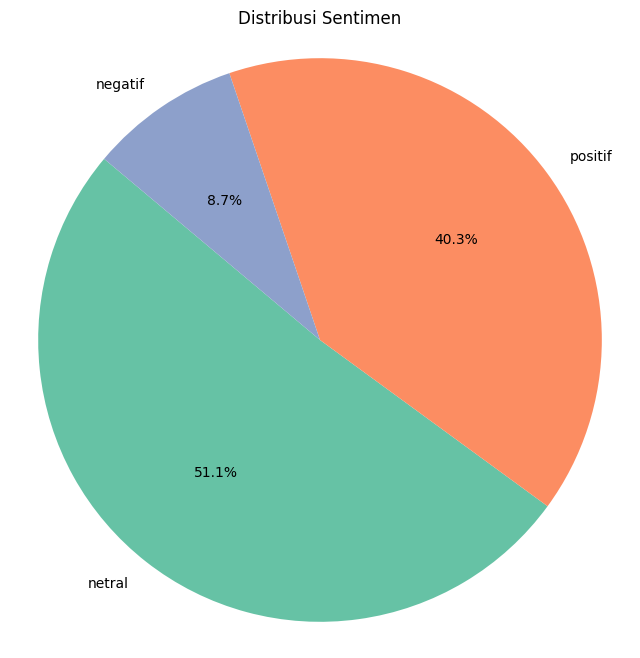

In [24]:
# Hitung jumlah setiap kategori sentimen
jumlah_sentimen = df['sentimen'].value_counts()

# Tampilkan diagram pie untuk distribusi sentimen
plt.figure(figsize=(8, 8))
plt.pie(jumlah_sentimen, 
        labels=jumlah_sentimen.index, 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=sns.color_palette("Set2"))
plt.title('Distribusi Sentimen')
plt.axis('equal')  # Supaya pie-nya bulat sempurna
plt.show()

#### Visualisasi Histogram Skor Sentimen

Untuk memahami lebih dalam bagaimana skor sentimen tersebar dalam dataset, kita gunakan **histogram**. Grafik ini menunjukkan seberapa sering skor-skor tertentu muncul, sehingga kita bisa melihat apakah pengguna cenderung memberi ulasan dengan nada sangat positif, sangat negatif, atau netral.

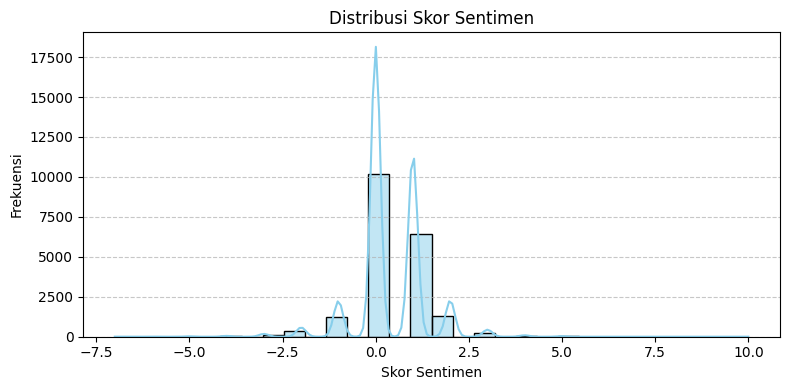

In [25]:
# Tampilkan distribusi skor sentimen menggunakan histogram
plt.figure(figsize=(8, 4))
sns.histplot(df['sentimen_skor'], bins=30, kde=True, color='skyblue')
plt.title('Distribusi Skor Sentimen')
plt.xlabel('Skor Sentimen')
plt.ylabel('Frekuensi')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Data Preparation

#### Menyiapkan Fitur dan Label untuk Model Machine Learning

Sebelum membangun model, kita perlu menyiapkan data dalam format yang bisa dipahami oleh algoritma pembelajaran mesin.

- **Fitur (`fitur`)** diambil dari kolom `clean_content`, yaitu teks ulasan yang telah melalui proses pembersihan, tokenisasi, penghilangan stopwords, dan normalisasi kata slang.
- **Label (`label`)** berasal dari kolom `sentimen`, yang kemudian dikonversi ke bentuk numerik:
  - `0` untuk sentimen *negatif*
  - `1` untuk sentimen *netral*
  - `2` untuk sentimen *positif*

Konversi ini diperlukan karena sebagian besar algoritma pembelajaran mesin hanya dapat bekerja dengan data numerik.

In [26]:
# Ambil kolom 'clean_content' sebagai fitur (X) dan 'sentimen' sebagai label (y)
fitur = df['clean_content']
label = df['sentimen'].map({'positif': 2, 'netral': 1, 'negatif': 0})  # Label numerik

### Feature Engineering



#### Vektorisasi Teks Menggunakan TF-IDF

Sebelum melatih model machine learning, teks perlu diubah ke bentuk numerik. Di tahap ini, kita gunakan TF-IDF (Term Frequency-Inverse Document Frequency) untuk mengonversi teks menjadi representasi vektor. Ini membantu model mengenali kata-kata yang penting dan membedakan dokumen satu dengan lainnya. Kita batasi hingga 10.000 fitur untuk menjaga efisiensi dan menghindari noise.

In [27]:
# Transformasi teks ke vektor angka menggunakan TF-IDF
tfidf = TfidfVectorizer(max_features=10000)
fitur_tfidf = tfidf.fit_transform(fitur)

# Menampilkan dimensi data hasil vektorisasi
print("Ringkasan Fitur dan Data:")
print(f"Dimensi fitur TF-IDF: {fitur_tfidf.shape}")

Ringkasan Fitur dan Data:
Dimensi fitur TF-IDF: (20000, 9464)


#### Praprocessing Teks untuk Model LSTM

Agar data teks bisa diproses oleh model deep learning seperti LSTM, kita perlu mengubahnya menjadi bentuk numerik berurutan. Di tahap ini, kita menggunakan Tokenizer dari Keras untuk mengubah setiap kata menjadi angka berdasarkan frekuensinya. Lalu, semua data dipadatkan ke panjang yang seragam (maksimal 100 kata per review) agar bisa diproses dalam batch oleh jaringan neural.

In [28]:
# Menginisialisasi tokenizer dan membatasi jumlah kata unik sebanyak 10.000
tokenizer = Tokenizer(num_words=10000)

# Menyesuaikan tokenizer dengan teks yang telah dibersihkan
tokenizer.fit_on_texts(fitur)

# Mengubah teks menjadi urutan angka berdasarkan kamus tokenizer
fitur_sekuensial = tokenizer.texts_to_sequences(fitur)

# Menyamakan panjang urutan dengan padding (maksimal 100 kata)
fitur_padat = pad_sequences(fitur_sekuensial, maxlen=100)

#### Menampilkan Statistik Data untuk Pelatihan Model

Sebelum melatih model LSTM, penting untuk memahami dimensi data dan jumlah kelas target. Di sini, kita menghitung berapa banyak kategori sentimen yang tersedia (positif, netral, negatif), serta ukuran dari fitur yang telah diproses dan ukuran total kosa kata (jumlah kata unik) yang terdeteksi oleh tokenizer.

In [29]:
# Menghitung jumlah kelas sentimen
jumlah_kelas = len(np.unique(label))
print(f"Jumlah kelas: {jumlah_kelas}")

# Menampilkan dimensi dari fitur hasil padding
print(f"Dimensi urutan fitur: {fitur_padat.shape}")

# Menampilkan ukuran kosa kata dari tokenizer
kosa_kata_index = tokenizer.word_index
print(f"\nUkuran kosa kata: {len(kosa_kata_index)} kata")

Jumlah kelas: 3
Dimensi urutan fitur: (20000, 100)

Ukuran kosa kata: 9492 kata


### Model Training & Evaluation

#### Deep Learning Model (LSTM)


##### Membagi Dataset untuk Pelatihan, Validasi, dan Pengujian

Agar model LSTM dapat dievaluasi secara objektif, data perlu dibagi ke dalam tiga subset: pelatihan (70%), pengujian (20%), dan validasi (10%). Pembagian ini membantu dalam menguji kinerja model secara adil dan menghindari overfitting. Hasil dari proses ini adalah tiga bagian data dengan jumlah sampel yang dihitung dan ditampilkan.

In [30]:
# Membagi data menjadi: pelatihan (70%), pengujian (20%), dan validasi (10%)
fitur_latih_lstm, fitur_uji_lstm, label_latih_lstm, label_uji_lstm = train_test_split(
    fitur_padat, label, test_size=0.2, random_state=42
)

# Mengambil 10% dari 80% data latih sebagai data validasi (0.1 / 0.8 = 0.125)
fitur_latih_lstm, fitur_validasi_lstm, label_latih_lstm, label_validasi_lstm = train_test_split(
    fitur_latih_lstm, label_latih_lstm, test_size=0.125, random_state=42
)

# Menampilkan jumlah sampel di setiap subset
print("Total Sampel:")
print(f"Set pelatihan: {fitur_latih_lstm.shape[0]} sampel")
print(f"Set validasi : {fitur_validasi_lstm.shape[0]} sampel")
print(f"Set pengujian: {fitur_uji_lstm.shape[0]} sampel")

Total Sampel:
Set pelatihan: 14000 sampel
Set validasi : 2000 sampel
Set pengujian: 4000 sampel


##### Membangun dan Melatih Model LSTM untuk Klasifikasi Sentimen

Model LSTM dikonfigurasi dengan lapisan embedding untuk merepresentasikan kata, diikuti dengan dropout spasial untuk mencegah overfitting. Lapisan LSTM digunakan untuk menangkap konteks urutan, dan output diklasifikasikan ke dalam tiga kategori sentimen melalui softmax. Proses pelatihan dilengkapi dengan callback `EarlyStopping` dan `ReduceLROnPlateau` untuk menghentikan pelatihan saat performa stagnan dan menyesuaikan laju pembelajaran secara otomatis.

In [31]:
# Membuat model LSTM untuk klasifikasi sentimen
model_lstm = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=100),       # Representasi kata dalam vektor
    SpatialDropout1D(0.4),                                               # Dropout untuk regularisasi
    LSTM(128, dropout=0.3, recurrent_dropout=0.3),                       # LSTM untuk memahami urutan kata
    Dense(3, activation='softmax')                                       # Output 3 kelas sentimen
])

# Menyusun model dengan loss dan optimizer
model_lstm.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(),
    metrics=['accuracy']
)

# Callback untuk kontrol pelatihan
callback_early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=2,
    restore_best_weights=True
)
callback_lr_reduction = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=2
)

# Daftar callback
callbacks = [callback_early_stopping, callback_lr_reduction]

# Menjalankan pelatihan model
riwayat_latihan = model_lstm.fit(
    fitur_latih_lstm, label_latih_lstm,
    validation_data=(fitur_validasi_lstm, label_validasi_lstm),
    epochs=15,
    batch_size=64,
    verbose=1,
    callbacks=callbacks
)

Epoch 1/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 27s 106ms/step - accuracy: 0.6856 - loss: 0.6556 - val_accuracy: 0.8990 - val_loss: 0.2678 - learning_rate: 0.0010
Epoch 2/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 22s 99ms/step - accuracy: 0.9219 - loss: 0.2057 - val_accuracy: 0.9380 - val_loss: 0.1714 - learning_rate: 0.0010
Epoch 3/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 21s 98ms/step - accuracy: 0.9694 - loss: 0.0957 - val_accuracy: 0.9435 - val_loss: 0.1477 - learning_rate: 0.0010
Epoch 4/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 21s 95ms/step - accuracy: 0.9805 - loss: 0.0585 - val_accuracy: 0.9490 - val_loss: 0.1410 - learning_rate: 0.0010
Epoch 5/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 21s 97ms/step - accuracy: 0.9875 - loss: 0.0333 - val_accuracy: 0.9560 - val_loss: 0.1339 - learning_rate: 0.0010
Epoch 6/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 21s 95ms/step - accuracy: 0.9923 - loss: 0.0257 - val_accuracy: 0.9520 - val_loss: 0.1547 - learning_rate: 0.0010
Epoch 7/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 21s 96ms/step - accuracy: 0.9951 - 

##### Evaluasi dan Visualisasi Performa Model LSTM

Setelah pelatihan selesai, model dievaluasi menggunakan data pengujian untuk mengukur kinerjanya di luar data latih. Akurasi pelatihan terakhir dibandingkan dengan akurasi pengujian. Model juga menghasilkan laporan klasifikasi yang menunjukkan presisi, recall, dan F1-score untuk masing-masing kategori sentimen. Untuk analisis visual, grafik loss dan akurasi selama epoch ditampilkan untuk memantau kestabilan model selama pelatihan.

125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9536 - loss: 0.1628

Evaluasi Model LSTM
Akurasi pelatihan per epoch terakhir: 0.9946
Akurasi pengujian akhir: 0.9520
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step

Laporan Klasifikasi:
              precision    recall  f1-score   support

     negatif       0.88      0.82      0.85       365
      netral       0.95      0.96      0.96      2032
     positif       0.97      0.97      0.97      1603

    accuracy                           0.95      4000
   macro avg       0.93      0.92      0.92      4000
weighted avg       0.95      0.95      0.95      4000



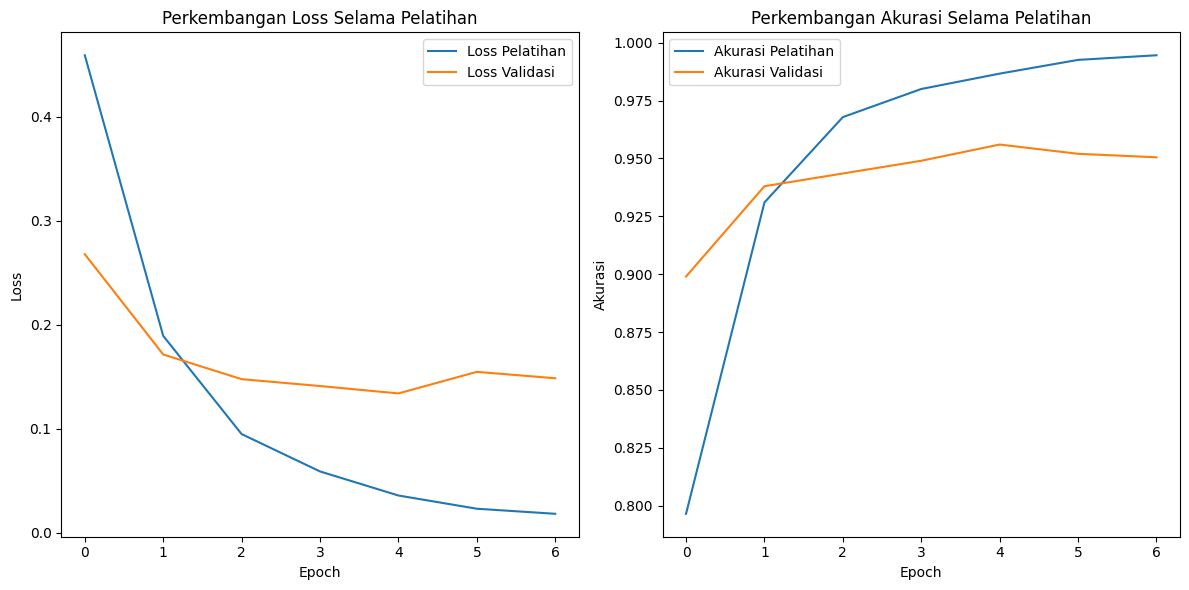

In [32]:
# Mengambil nilai akurasi pelatihan terakhir
akurasi_latih = riwayat_latihan.history['accuracy']

# Evaluasi terhadap data pengujian
kerugian_uji, akurasi_lstm = model_lstm.evaluate(fitur_uji_lstm, label_uji_lstm)

# Menampilkan hasil evaluasi
print("\nEvaluasi Model LSTM")
print(f"Akurasi pelatihan per epoch terakhir: {akurasi_latih[-1]:.4f}")
print(f"Akurasi pengujian akhir: {akurasi_lstm:.4f}")

# Prediksi terhadap data uji
y_prediksi = np.argmax(model_lstm.predict(fitur_uji_lstm), axis=1)

# Menampilkan laporan klasifikasi berdasarkan label sebenarnya
print("\nLaporan Klasifikasi:")
print(classification_report(label_uji_lstm, y_prediksi, target_names=['negatif', 'netral', 'positif']))

# Visualisasi loss dan akurasi selama pelatihan
plt.figure(figsize=(12, 6))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(riwayat_latihan.history['loss'], label='Loss Pelatihan')
plt.plot(riwayat_latihan.history['val_loss'], label='Loss Validasi')
plt.title('Perkembangan Loss Selama Pelatihan')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot akurasi
plt.subplot(1, 2, 2)
plt.plot(riwayat_latihan.history['accuracy'], label='Akurasi Pelatihan')
plt.plot(riwayat_latihan.history['val_accuracy'], label='Akurasi Validasi')
plt.title('Perkembangan Akurasi Selama Pelatihan')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()

plt.tight_layout()
plt.show()

##### Visualisasi Confusion Matrix Model LSTM

Confusion matrix memberikan gambaran mendalam mengenai prediksi model terhadap setiap kelas sentimen. Matriks ini membantu mengidentifikasi seberapa baik model membedakan antara sentimen negatif, netral, dan positif. Warna yang lebih gelap menunjukkan jumlah prediksi yang lebih banyak. Idealnya, prediksi akan terkonsentrasi di diagonal utama (yang menunjukkan prediksi benar).

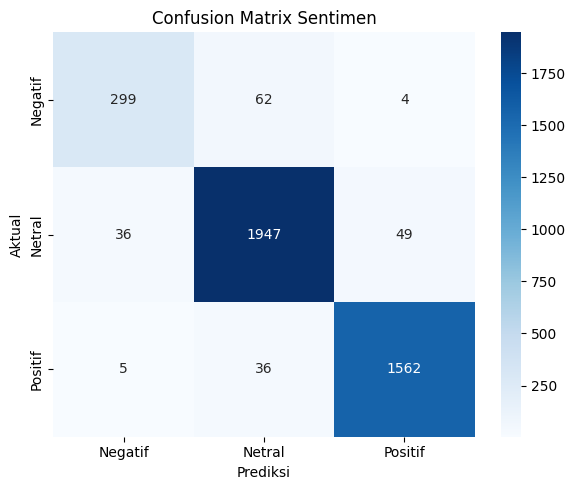

In [33]:
# Membuat confusion matrix
matriks_konfusi = confusion_matrix(label_uji_lstm, y_prediksi)

# Menentukan label kelas
label_kategori = ['Negatif', 'Netral', 'Positif']

# Menampilkan confusion matrix dengan heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(matriks_konfusi, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_kategori, yticklabels=label_kategori)
plt.title('Confusion Matrix Sentimen')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.tight_layout()
plt.show()

##### Menghitung Akurasi, Precision, Recall, dan F1-score dari Confusion Matrix

Selain menampilkan confusion matrix, penting juga untuk menghitung metrik evaluasi seperti akurasi, precision, recall, dan F1-score secara manual. Ini membantu memahami performa model secara menyeluruh pada setiap kelas. Dengan melihat nilai-nilai ini, kita dapat mengetahui apakah model condong ke salah satu kelas, atau bekerja secara seimbang.

In [34]:
# Ambil nilai dari confusion matrix
TN, FP, FN, TP = None, None, None, None  # placeholder untuk binary, kita hitung secara multi-kelas

# Mengambil nilai matrix
cm = confusion_matrix(label_uji_lstm, y_prediksi)
print("Confusion Matrix:")
print(cm)

# Hitung metrik per kelas
for i, kelas in enumerate(['Negatif', 'Netral', 'Positif']):
    TP = cm[i, i]
    FP = cm[:, i].sum() - TP
    FN = cm[i, :].sum() - TP
    TN = cm.sum() - (TP + FP + FN)

    precision = TP / (TP + FP) if (TP + FP) != 0 else 0
    recall = TP / (TP + FN) if (TP + FN) != 0 else 0
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) != 0 else 0

    print(f"\nKelas: {kelas}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall:    {recall:.4f}")
    print(f"  F1-score:  {f1:.4f}")

# Hitung akurasi keseluruhan
akurasi_total = np.trace(cm) / np.sum(cm)
print(f"\nAkurasi Keseluruhan: {akurasi_total:.4f}")

Confusion Matrix:
[[ 299   62    4]
 [  36 1947   49]
 [   5   36 1562]]

Kelas: Negatif
  Precision: 0.8794
  Recall:    0.8192
  F1-score:  0.8482

Kelas: Netral
  Precision: 0.9521
  Recall:    0.9582
  F1-score:  0.9551

Kelas: Positif
  Precision: 0.9672
  Recall:    0.9744
  F1-score:  0.9708

Akurasi Keseluruhan: 0.9520


#### Traditional Machine Learning Models

#### SVM + TF-IDF (80/20)

##### Membagi Data Pelatihan dan Pengujian

Sebelum melatih model Support Vector Machine (SVM), data perlu dipisahkan terlebih dahulu ke dalam set pelatihan dan set pengujian. Pembagian ini penting agar kita bisa mengukur performa model secara objektif terhadap data yang belum pernah dilihat sebelumnya. Pada kasus ini, kita akan menggunakan 80% data untuk pelatihan dan 20% untuk pengujian.

In [38]:
# Membagi Data menjadi Set Pelatihan dan Pengujian
X_latih_svm, X_uji_svm, y_latih_svm, y_uji_svm = train_test_split(fitur_tfidf, label, test_size=0.2, random_state=42)

print("Total Sampel:")
print(f"Set pelatihan: {X_latih_svm.shape[0]} sampel")
print(f"Set pengujian: {X_uji_svm.shape[0]} sampel")

Total Sampel:
Set pelatihan: 16000 sampel
Set pengujian: 4000 sampel


##### Pelatihan dan Prediksi Model SVM

Setelah data dibagi, kita melatih model Support Vector Machine (SVM) menggunakan kernel linear karena cocok untuk klasifikasi teks. Kemudian, model digunakan untuk memprediksi label sentimen dari data pengujian.

In [39]:
# Inisialisasi Model SVM dengan Kernel Linear
model_svm = SVC(kernel='linear', probability=True)

# Latih Model
model_svm.fit(X_latih_svm, y_latih_svm)

# Lakukan Prediksi
y_pred_svm = model_svm.predict(X_uji_svm)

##### Evaluasi Model SVM Berbasis TF-IDF

Setelah pelatihan, performa model Support Vector Machine (SVM) dievaluasi dengan menghitung akurasi pada data pelatihan dan pengujian. Selain itu, laporan klasifikasi memberikan wawasan tentang presisi, recall, dan F1-score dari masing-masing kelas sentimen. Untuk visualisasi, digunakan confusion matrix (matriks kebingungan) agar lebih mudah memahami prediksi yang salah dan benar.


Evaluasi Model SVM + TF-IDF

Akurasi Latih: 0.9790
Akurasi Uji: 0.9393

Laporan Klasifikasi:
              precision    recall  f1-score   support

     negatif       0.92      0.67      0.78       365
      netral       0.91      0.98      0.94      2032
     positif       0.98      0.95      0.97      1603

    accuracy                           0.94      4000
   macro avg       0.94      0.87      0.90      4000
weighted avg       0.94      0.94      0.94      4000



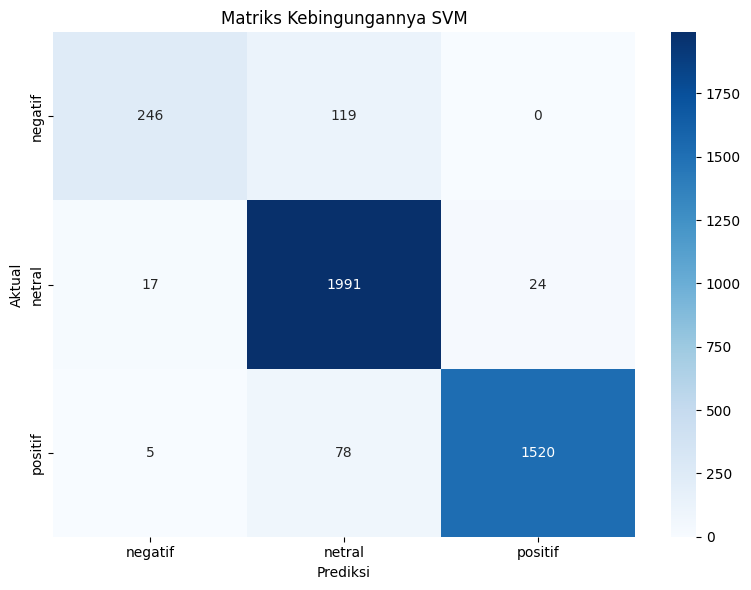

In [40]:
# Evaluasi Model
akurasi_latih_svm = accuracy_score(y_latih_svm, model_svm.predict(X_latih_svm))
akurasi_svm = accuracy_score(y_uji_svm, y_pred_svm)

print("\nEvaluasi Model SVM + TF-IDF")
print(f'\nAkurasi Latih: {akurasi_latih_svm:.4f}')
print(f'Akurasi Uji: {akurasi_svm:.4f}')

print("\nLaporan Klasifikasi:")
print(classification_report(y_uji_svm, y_pred_svm, target_names=['negatif', 'netral', 'positif']))

# Plot Matriks Kebingungannya
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_uji_svm, y_pred_svm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['negatif', 'netral', 'positif'],
            yticklabels=['negatif', 'netral', 'positif'])
plt.title('Matriks Kebingungannya SVM')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.tight_layout()
plt.show()

#### Random Forest + TF-IDF (70/30)

##### Membagi Data Pelatihan dan Pengujian

Langkah ini bertujuan untuk memisahkan data fitur dan label menjadi dua bagian utama: 70% digunakan untuk proses pelatihan model dan 30% sisanya untuk pengujian performa model Random Forest. Pembagian dilakukan secara acak namun konsisten dengan menetapkan seed agar hasilnya dapat direproduksi.

In [42]:
# Bagi Data menjadi Set Latih dan Set Uji (70% Latih, 30% Uji)
X_latih_rf, X_uji_rf, y_latih_rf, y_uji_rf = train_test_split(fitur_tfidf, label, test_size=0.3, random_state=42)

print("Jumlah Sampel: ")
print(f"Set Latih: {X_latih_rf.shape[0]} sampel")
print(f"Set Uji: {X_uji_rf.shape[0]} sampel")

Jumlah Sampel: 
Set Latih: 14000 sampel
Set Uji: 6000 sampel


##### Inisialisasi dan Pelatihan Model Random Forest untuk Klasifikasi Sentimen

Pada tahap ini, model Random Forest dikonfigurasi menggunakan sejumlah 300 pohon keputusan (n_estimators) dan beberapa pengaturan hyperparameter untuk meningkatkan akurasi prediksi dan mengurangi overfitting. Setelah diinisialisasi, model dilatih menggunakan data pelatihan yang telah disiapkan sebelumnya, lalu diterapkan untuk memprediksi label dari data uji.

In [43]:
# Inisialisasi Model Random Forest dengan Penyesuaian Hyperparameter
rf_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)

# Latih Model
rf_model.fit(X_latih_rf, y_latih_rf)

# Lakukan Prediksi
y_pred_rf = rf_model.predict(X_uji_rf)

##### Evaluasi Model Random Forest dengan Representasi TF-IDF

Setelah proses pelatihan selesai, model Random Forest dievaluasi untuk mengukur performanya dalam mengklasifikasikan data sentimen. Evaluasi ini mencakup akurasi pada data latih dan uji, laporan klasifikasi yang memberikan rincian presisi, recall, dan f1-score, serta visualisasi melalui confusion matrix untuk memahami distribusi prediksi model.


Evaluasi Model Random Forest dengan TF-IDF
Akurasi Latih: 0.9619
Akurasi Uji: 0.9252

Laporan Klasifikasi:
              precision    recall  f1-score   support

     negatif       0.87      0.62      0.72       538
      netral       0.90      0.96      0.93      3079
     positif       0.96      0.94      0.95      2383

    accuracy                           0.93      6000
   macro avg       0.91      0.84      0.87      6000
weighted avg       0.92      0.93      0.92      6000



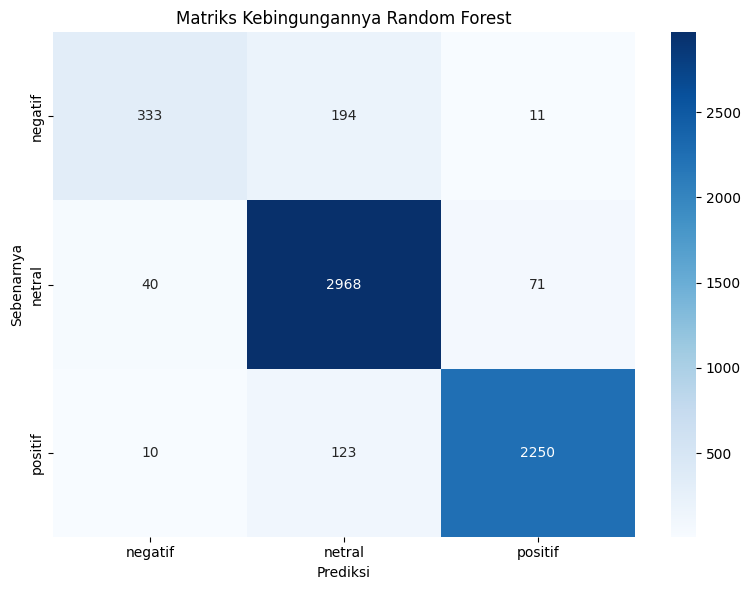

In [44]:
# Evaluasi Model
akurat_latih = accuracy_score(y_latih_rf, rf_model.predict(X_latih_rf))
akurat_uji_rf = accuracy_score(y_uji_rf, y_pred_rf)

print("\nEvaluasi Model Random Forest dengan TF-IDF")
print(f"Akurasi Latih: {akurat_latih:.4f}")
print(f"Akurasi Uji: {akurat_uji_rf:.4f}")

print("\nLaporan Klasifikasi:")
print(classification_report(y_uji_rf, y_pred_rf, target_names=['negatif', 'netral', 'positif']))

# Plot Matriks Kebingungannya
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_uji_rf, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['negatif', 'netral', 'positif'],
            yticklabels=['negatif', 'netral', 'positif'])
plt.title('Matriks Kebingungannya Random Forest')
plt.xlabel('Prediksi')
plt.ylabel('Sebenarnya')
plt.tight_layout()
plt.show()

### Perbandingan Performa Model

Tabel ini menyajikan perbandingan performa dari tiga model berbeda yang digunakan untuk klasifikasi sentimen, yaitu LSTM dengan fitur Word Embedding, SVM dengan fitur TF-IDF, dan Random Forest (RF) juga menggunakan TF-IDF. Masing-masing model dilatih menggunakan rasio data pelatihan dan pengujian yang berbeda, dan akurasinya ditampilkan dalam format persentase untuk memudahkan interpretasi.

In [46]:
# Membuat tabel ringkasan performa model
ringkasan = {
    'Model': ['LSTM + Embedding (80/20)', 'SVM + TF-IDF (80/20)', 'Random Forest + TF-IDF (70/30)'],
    'Akurasi': [akurasi_lstm, akurasi_svm, akurat_uji_rf],  # gunakan nama variabel yang benar
    'Rasio Pembagian Data': ['80/20', '80/20', '70/30'],
    'Jenis Fitur': ['Word Embedding', 'TF-IDF', 'TF-IDF']
}

# Mengonversi ke DataFrame
df_ringkasan = pd.DataFrame(ringkasan)

# Format akurasi menjadi persen
df_ringkasan['Akurasi'] = df_ringkasan['Akurasi'].apply(lambda x: f"{x:.2%}")

# Menampilkan ringkasan
print("Ringkasan Hasil Evaluasi Model")
display(df_ringkasan)

Ringkasan Hasil Evaluasi Model


,Model,Akurasi,Rasio Pembagian Data,Jenis Fitur
0,LSTM + Embedding (80/20),95.20%,80/20,Word Embedding
1,SVM + TF-IDF (80/20),93.92%,80/20,TF-IDF
2,Random Forest + TF-IDF (70/30),92.52%,70/30,TF-IDF


### Save Models for Inference

Langkah ini dilakukan untuk menyimpan model hasil pelatihan beserta komponen pendukung seperti TF-IDF vectorizer dan tokenizer agar dapat digunakan kembali tanpa perlu melatih ulang.

In [49]:
# Simpan Model LSTM
model_lstm.save("../Models/lstm_sentiment_model.h5")

# Simpan Model SVM
with open("../Models/svm_sentiment_model.pkl", "wb") as f:
    pickle.dump(model_svm, f)

# Simpan Model Random Forest
with open("../Models/rf_sentiment_model.pkl", "wb") as f:
    pickle.dump(rf_model, f)

# Simpan TF-IDF Vectorizer
with open("../Models/vectorizer.pkl", "wb") as f:
    pickle.dump(tfidf, f)

# Simpan Tokenizer
with open("../Models/tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)